# **Students**

Frits van der Loo (i6205814)

Ferdaos Panjshiri (i6211194)

#**Introduction**


Main: How has schooling influenced the GDP of the Benelux?
1. How has schooling influenced the GDP of the Netherlands?
2. How does the Netherlands compare to other Benelux countries?


# **Data preparation**

In [5]:
import pandas as pd

data = pd.read_csv('https://raw.githubusercontent.com/NHameleers/dtz2025-datasets/master/CountryHealthFactors.csv')

selected_columns = ['Country', 'Year', 'Status', 'Adult Mortality', 'Schooling', 'GDP']
data = data[selected_columns]

selected_countries = ['Netherlands', 'Belgium', 'Luxembourg']
data = data[data['Country'].isin(selected_countries)]

print(data)


          Country  Year     Status  Adult Mortality  Schooling           GDP
240       Belgium  2015  Developed             74.0       16.6    4356.87500
241       Belgium  2014  Developed             76.0       16.3   47439.39684
242       Belgium  2013  Developed             77.0       16.3    4651.38647
243       Belgium  2012  Developed             78.0       16.2    4474.57170
244       Belgium  2011  Developed              8.0       16.1    4772.77415
245       Belgium  2010  Developed             81.0       15.9    4438.23741
246       Belgium  2009  Developed             85.0       15.8    4488.56150
247       Belgium  2008  Developed             87.0       15.8   48424.58927
248       Belgium  2007  Developed             86.0       15.8    4443.83131
249       Belgium  2006  Developed             85.0       15.7   38852.36130
250       Belgium  2005  Developed             89.0       15.7   36967.28292
251       Belgium  2004  Developed             91.0       18.8   35589.71295

# **Explore and clean the data**

In [4]:
data.describe()

,Year,Adult Mortality,Schooling,GDP
count,48.000000,48.000000,48.000000,48.000000
mean,2007.500000,66.458333,15.827083,35045.679512
std,4.658554,28.830361,1.756173,33295.997029
min,2000.000000,1.000000,13.400000,519.349000
25%,2003.750000,63.000000,13.900000,4742.427230
50%,2007.500000,75.000000,16.250000,32031.243955
75%,2011.250000,85.000000,16.900000,48920.685643
max,2015.000000,99.000000,18.800000,119172.741800


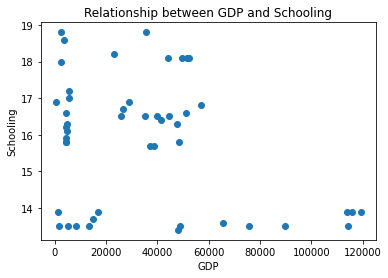

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(data['GDP'], data['Schooling'])
plt.title('Relationship between GDP and Schooling')
plt.xlabel('GDP')
plt.ylabel('Schooling')
plt.show()

In [ ]:
adult_mortality_WHO = {
    'Belgium': {
        2000: 99.35,
        2001: 98.11,
        2002: 96.58,
        2003: 93.56,
        2004: 89.46,
        2005: 88.15,
        2006: 84.6,
        2007: 85.75,
        2008: 85.99,
        2009: 84.17,
        2010: 81.24,
        2011: 80.81,
        2012: 78.97,
        2013: 76.55,
        2014: 72.82,
        2015: 71.87},
    'Luxembourg': {
        2000: 89.95,
        2001: 90.22,
        2002: 86.58,
        2003: 84.85,
        2004: 79.39,
        2005: 81.14,
        2006: 77.86,
        2007: 74.51,
        2008: 68.75,
        2009: 66.87,
        2010: 66.83,
        2011: 65.5,
        2012: 62.58,
        2013: 59.67,
        2014: 54.65,
        2015: 51.89},
    'Netherlands': 
    {
        2000: 83.48,
        2001: 81.76,
        2002: 80.67,
        2003: 79.77,
        2004: 76.21,
        2005: 71.98,
        2006: 69.97,
        2007: 67.13,
        2008: 67.21,
        2009: 65.17,
        2010: 64.33,
        2011: 63.89,
        2012: 62.95,
        2013: 60.89,
        2014: 59.03,
        2015: 58.32}}

for country, year_mortality_dict in adult_mortality_WHO.items():
    for year, mortality in year_mortality_dict.items():
        data.loc[(data['Country'] == country) & (data['Year'] == year), 'Adult Mortality'] = mortality

GDP_IMF = {
    'Belgium': {
        2000: 29110.000,
        2001: 23121.56635,
        2002: 30870.000,
        2003: 31670.000,
        2004: 35589.71295,
        2005: 36967.28292,
        2006: 38852.36130,
        2007: 39140.000,
        2008: 48424.58927,
        2009: 38890.000,
        2010: 40160.000,
        2011: 41080.000,
        2012: 42410.000,
        2013: 43760.000,
        2014: 47439.39684,
        2015: 46370.000},
    'Luxembourg': {
        2000: 48735.99549,
        2001: 48179.42850,
        2002: 71650.000,
        2003: 65445.88530,
        2004: 75716.35180,
        2005: 81660.000,
        2006: 89739.71170,
        2007: 95960.000,
        2008: 114293.84330,
        2009: 91620.000,
        2010: 94560.000,
        2011: 115761.57700,
        2012: 97750.000,
        2013: 113751.85000,
        2014: 119172.74180,
        2015: 109150.000},
    'Netherlands': 
    {   2000: 25921.12794,
        2001: 26584.12169,
        2002: 28817.32321,
        2003: 35245.16470,
        2004: 39954.64222,
        2005: 41577.16900,
        2006: 44453.97119,
        2007: 51241.31562,
        2008: 56928.82480,
        2009: 44380.000,
        2010: 45270.000,
        2011: 46700.000,
        2012: 49474.75610,
        2013: 51574.48942,
        2014: 52157.46870,
        2015: 44292.88473}}

for country, year_GDP_dict in GDP_IMF.items():
    for year, GDP in year_GDP_dict.items():
        data.loc[(data['Country'] == country) & (data['Year'] == year), 'GDP'] = GDP

As part of the assignment was to give a description of the population in the Benelux countries; Belgium, Netherlands and Luxembourg, we highlighted the data on the country, the year, the development status, life expectancy, adult mortality, infant deaths, schooling and GDP. When exploring and cleaning up the data, we used different sources in order to gain an understanding into which values were considered fair, and which ones were considered to be implausible. Following this, we discovered that both the topics of adult mortality and GDP had issues in their values when comparing these values to the ones provided by the WHO (World Health Organization, n.d.) and the IMF (IMF, n.d.). After discovering these, we ended up replacing the incorrect numbers with the ones that were available on these sites. 

In [ ]:
print(data.isnull().sum())

Country            0
Year               0
Status             0
Adult Mortality    0
Schooling          0
GDP                0
dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as mplot

data = data[data['Country'].isin(selected_countries)]
data[['Adult Mortality','Schooling', 'GDP']].groupby(data['Country']).describe().transpose()

Country                     Belgium     Luxembourg   Netherlands
Adult Mortality count     16.000000      16.000000     16.000000
                mean      85.498750      72.577500     69.547500
                std        8.460089      12.267527      8.433299
                min       71.870000      51.890000     58.320000
                25%       80.350000      64.770000     63.655000
                50%       85.175000      71.630000     67.170000
                75%       90.485000      82.067500     77.100000
                max       99.350000      90.220000     83.480000
Schooling       count     16.000000      16.000000     16.000000
                mean      16.787500      13.637500     17.056250
                std        1.218127       0.192787      0.658249
                min       15.700000      13.400000     16.400000
                25%       15.800000      13.500000     16.500000
                50%       16.250000      13.500000     16.850000
                75%       18.050000      13.900000     17.425000
                max       18.800000      13.900000     18.100000
GDP             count     16.000000      16.000000     16.000000
                mean   38365.931852   89571.711556  42785.828707
                std     6992.692720   22828.038158   9376.521603
                min    23121.566350   48179.428500  25921.127940
                25%    34609.784712   74699.763850  38777.272840
                50%    39015.000000   93090.000000  44416.985595
                75%    42747.500000  110300.462500  49916.395980
                max    48424.589270  119172.741800  56928.824800

*Interactive Visualization*

In [ ]:
import pandas as pd
import plotly.express as pex
from plotly.subplots import make_subplots
import plotly.graph_objs as go
from ipywidgets import interact

selected_columns = ['Country', 'Year', 'Status', 'Adult Mortality', 'Schooling', 'GDP']
selected_countries = ['Netherlands', 'Belgium', 'Luxembourg']
data = data[selected_columns]
data = data[data['Country'].isin(selected_countries)]

def update_plot(Netherlands=True, Belgium=True, Luxembourg=True):
    fig = make_subplots()
    
    if Netherlands:
        nl_data = data[data['Country'] == 'Netherlands']
        fig.add_trace(go.Scatter(x=nl_data['Schooling'], y=nl_data['GDP'], name='Netherlands', mode='markers', hovertext=nl_data['Year']), row=1, col=1)
    if Belgium:
        be_data = data[data['Country'] == 'Belgium']
        fig.add_trace(go.Scatter(x=be_data['Schooling'], y=be_data['GDP'], name='Belgium', mode='markers', hovertext=be_data['Year']), row=1, col=1)
    if Luxembourg:
        lu_data = data[data['Country'] == 'Luxembourg']
        fig.add_trace(go.Scatter(x=lu_data['Schooling'], y=lu_data['GDP'], name='Luxembourg', mode='markers', hovertext=lu_data['Year']), row=1, col=1)
    
    fig.update_layout(title='Schooling vs GDP', xaxis_title='Schooling', yaxis_title='GDP')
    
    fig.show()

interact(update_plot, Netherlands=True, Belgium=True, Luxembourg=True);

interactive(children=(Checkbox(value=True, description='Netherlands'), Checkbox(value=True, description='Belgi…

#**Conclusion**

In regards to the research question, I think the above seen graph shows that the correlation between GDP and Schooling can differ when comparing the Benelux countries.

Specifically looking at the Netherlands, it can be seen that there is a large spread across the graph without a well-defined regression line appearring. Therefore it is not the case that higher levels of schooling immediately increases the GDP.

And this same observation can be made when looking at the graph for Belgium. This chart have a similar manner of data points being spread across the graph.

Finally, the graph for Luxembourg does seem to have some for of positive correlation. It can be seen that lower levels of schooling do have somewhat lower GDP, whereas higher schooling levels do equate to an increase in GDP.

*Contribution statement*

Both authors had an equal share in the making of this exam and the making of the work book. Both were involved in the writing of the code, the analyzing of the results, and the writing of the conclusion. 

#**Literature**

World Health Organization. (n.d.). Adult mortality rate (probability of dying between 15 and 60 years per 1000 population). World Health Organization. Retrieved March 5, 2023, from https://www.who.int/data/gho/data/indicators/indicator-details/GHO/adult-mortality-rate-(probability-of-dying-between-15-and-60-years-per-1000-population) 

IMF. (n.d.). Retrieved March 5, 2023, from https://www.imf.org/external/datamapper/PPPPC@WEO/OEMDC/ADVEC/WEOWORLD/BEL 


**EXTRA GITHUB LINK:** 

https://github.com/ferdaosp/voila